## imort libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## import train data set

In [33]:
dataset = pd.read_csv('dataset/train.csv')

In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [35]:
%timeit 
li = dataset.columns
for i in li:
    if(dataset[i].isnull().sum()>0):
        print(i + " "+ str(dataset[i].isnull().sum()))

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


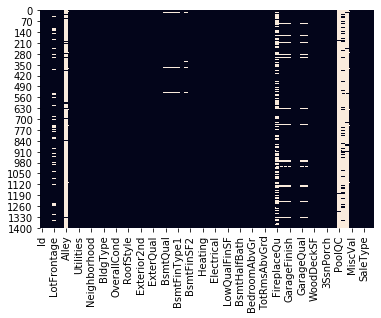

In [36]:
sns.heatmap(dataset.isnull(),cbar=False)

In [37]:
dataset.shape

(1460, 81)

## let's replace Nan values one by one

In [38]:

dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())

In [39]:
#drop Alley column
dataset_copy = dataset
dataset.drop(['Alley','MiscFeature','Id'],axis = 1,inplace=True)

In [40]:
%timeit 
li = dataset.columns
for i in li:
    if(dataset[i].isnull().sum()>0):
        print(i+" "+ str(type(dataset[i][0])) + " "+ str(dataset[i].isnull().sum()))

MasVnrType <class 'str'> 8
MasVnrArea <class 'numpy.float64'> 8
BsmtQual <class 'str'> 37
BsmtCond <class 'str'> 37
BsmtExposure <class 'str'> 38
BsmtFinType1 <class 'str'> 37
BsmtFinType2 <class 'str'> 38
Electrical <class 'str'> 1
FireplaceQu <class 'float'> 690
GarageType <class 'str'> 81
GarageYrBlt <class 'numpy.float64'> 81
GarageFinish <class 'str'> 81
GarageQual <class 'str'> 81
GarageCond <class 'str'> 81
PoolQC <class 'float'> 1453
Fence <class 'float'> 1179


In [41]:
dataset.drop(['Fence','PoolQC'],axis = 1,inplace=True)

In [42]:
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode()[0])

In [43]:
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode()[0])

In [44]:
columnList = ['MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','GarageCond', 'GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'Electrical', 'BsmtFinType2' ,'BsmtFinType1']
for i in columnList:
    dataset[i] = dataset[i].fillna(dataset[i].mode()[0])


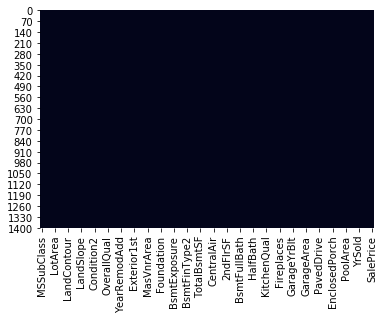

In [45]:
sns.heatmap(dataset.isnull(),cbar=False)

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [47]:
dataset.shape

(1460, 76)

In [48]:
testSet = pd.read_csv('trainset.csv')

In [49]:
testSet.shape

(1459, 75)

In [50]:
main_df = dataset.copy()

In [51]:
cobined_df = pd.concat([dataset,testSet],axis=0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [52]:
cobined_df.shape
print(cobined_df['FireplaceQu'][0])

0    Gd
0    Gd
Name: FireplaceQu, dtype: object


In [53]:
li = cobined_df.columns
num_li =  cobined_df._get_numeric_data().columns
cat_col_li = []
for i in li:
    if i not in num_li:
        cat_col_li.append(i)

In [54]:
len(cat_col_li)

39

In [55]:
cat_col_li

['BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [56]:
def category_onehot_multcols(multcolumns):
    df_final=cobined_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(cobined_df[fields],drop_first=True)
        
        cobined_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([cobined_df,df_final],axis=1)
        
    return df_final

In [57]:
cobined_df=category_onehot_multcols(cat_col_li)

BldgType
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
BsmtQual
CentralAir
Condition1
Condition2
Electrical
ExterCond
ExterQual
Exterior1st
Exterior2nd
FireplaceQu
Foundation
Functional
GarageCond
GarageFinish
GarageQual
GarageType
Heating
HeatingQC
HouseStyle
KitchenQual
LandContour
LandSlope
LotConfig
LotShape
MSZoning
MasVnrType
Neighborhood
PavedDrive
RoofMatl
RoofStyle
SaleCondition
SaleType
Street
Utilities


In [58]:
cobined_df.shape

(2919, 237)

In [60]:
cobined_df =cobined_df.loc[:,~cobined_df.columns.duplicated()]

In [61]:
cobined_df.shape

(2919, 177)

In [64]:
cobined_df

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,Pave,NoSeWa
0,856,854,0,3,706.0,0.0,1.0,0.0,150.0,0,...,0,0,0,0,0,0,0,1,1,0
1,1262,0,0,3,978.0,0.0,0.0,1.0,284.0,0,...,0,0,0,0,0,0,0,1,1,0
2,920,866,0,3,486.0,0.0,1.0,0.0,434.0,0,...,0,0,0,0,0,0,0,1,1,0
3,961,756,0,3,216.0,0.0,1.0,0.0,540.0,272,...,0,0,0,0,0,0,0,1,1,0
4,1145,1053,0,4,655.0,0.0,1.0,0.0,490.0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,546,546,0,3,0.0,0.0,0.0,0.0,546.0,0,...,0,0,0,0,0,0,0,1,1,0
1455,546,546,0,3,252.0,0.0,0.0,0.0,294.0,0,...,0,0,0,0,0,0,0,1,1,0
1456,1224,0,0,4,1224.0,0.0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,1,1,0
1457,970,0,0,3,337.0,0.0,0.0,1.0,575.0,0,...,0,0,0,0,0,0,0,1,1,0


In [77]:
train_set = cobined_df.iloc[:1460,:]
test_set = cobined_df.iloc[1460:,:]
test_set.drop(['SalePrice'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
train_set.shape

(1460, 177)

In [79]:
test_set.shape

(1459, 176)

In [89]:
X_train=train_set.drop(['SalePrice'],axis=1)
y_train=train_set['SalePrice']

In [90]:
from sklearn.linear_model import LinearRegression
lin_Reg = LinearRegression()
lin_Reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
y_pred = lin_Reg.predict(X_train)

In [97]:
y_train = np.array(y_train)

In [98]:
y_train

array([208500., 181500., 223500., ..., 266500., 142125., 147500.])

In [100]:
y_pred = lin_Reg.predict(test_set)

In [101]:
y_pred

array([114778.33, 155096.77, 185219.15, ..., 176928.8 , 104330.64,
       234201.29])

In [103]:
test_set = pd.read_csv('dataset/test.csv')

In [104]:
sub_df = pd.DataFrame({'Id': test_set['Id'], 'SalePrice': y_pred})
sub_df.to_csv('submit.csv', index=False)